## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/cleaned/train_V2_cleaned.csv")
df.head()

,income_am,profit_last_am,profit_am,damage_am,damage_inc,crd_lim_rec,credit_use_ic,gluten_ic,lactose_ic,insurance_ic,...,shop_use,retired,gold_status,outcome_profit,outcome_damage_inc,outcome_damage_amount,gender_M,gender_V,combined_pos_score,combined_neg_score
0,268.0,16.0,1682.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1672.78,1,829.66,1,0,0.00000,7.955259
1,283.0,23.0,1673.0,0.0,0.0,750.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1001.40,0,0.00,1,0,0.33433,1.842549
2,227.0,0.0,1685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1785.59,0,0.00,0,1,0.00000,0.889793
3,227.0,0.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.151873,0.0,0.0,1127.05,0,0.00,0,1,0.00000,0.000000
4,229.0,810.0,1620.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,1640.31,0,0.00,1,0,0.00000,6.894609


## Prepare data for model training

In [3]:
# turns continous variables into numbers
df = df.astype(int)

In [4]:
X = df.drop(columns=["outcome_profit", 'outcome_damage_inc', 'outcome_damage_amount'], axis=1)
y = df["outcome_damage_inc"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Training different models to find the best one

### 1. Logistic regression _

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

# metric
acc_log = accuracy_score(y_test, Y_pred)
pre_log = precision_score(y_test, Y_pred)
rec_log = recall_score(y_test, Y_pred)
f1_log = f1_score(y_test, Y_pred)

# print metrics
print(acc_log, pre_log, rec_log, f1_log)

0.746969696969697 0.0 0.0 0.0


### 2. KNeighborsClassifier _

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

# metric
acc_knn = accuracy_score(y_test, Y_pred)
pre_knn = precision_score(y_test, Y_pred)
rec_knn = recall_score(y_test, Y_pred)
f1_knn = f1_score(y_test, Y_pred)

# print metrics
print(acc_knn, pre_knn, rec_knn, f1_knn)

0.7136363636363636 0.2608695652173913 0.0718562874251497 0.11267605633802817


### 2. SVC _

In [8]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)

# metric
acc_svc = accuracy_score(y_test, Y_pred)
pre_svc = precision_score(y_test, Y_pred)
rec_svc = recall_score(y_test, Y_pred)
f1_svc = f1_score(y_test, Y_pred)

# print metrics
print(acc_svc, pre_svc, rec_svc, f1_svc)

0.746969696969697 0.0 0.0 0.0


### 3. DecisionTreeClassifier _

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
Y_pred = dtclf.predict(X_test)

# metric
acc_dtclf = accuracy_score(y_test, Y_pred)
pre_dtclf = precision_score(y_test, Y_pred)
rec_dtclf = recall_score(y_test, Y_pred)
f1_dtclf = f1_score(y_test, Y_pred)

# print metrics
print(acc_dtclf, pre_dtclf, rec_dtclf, f1_dtclf)

0.6424242424242425 0.30057803468208094 0.31137724550898205 0.3058823529411765


### 4. RandomForestClassifier _

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)
Y_pred = rfclf.predict(X_test)

# metric
acc_rfclf = accuracy_score(y_test, Y_pred)
pre_rfclf = precision_score(y_test, Y_pred)
rec_rfclf = recall_score(y_test, Y_pred)
f1_rfclf = f1_score(y_test, Y_pred)

# print metrics
print(acc_rfclf, pre_rfclf, rec_rfclf, f1_rfclf)

0.740909090909091 0.3888888888888889 0.041916167664670656 0.07567567567567568


## Model comparison

In [11]:
all_ACCs = [ acc_log, acc_knn, acc_svc, acc_dtclf, acc_rfclf]
all_PREs = [ pre_log, pre_knn, pre_svc, pre_dtclf, pre_rfclf]
all_RECs = [ rec_log, rec_knn, rec_svc, rec_dtclf, rec_rfclf]
all_F1s  = [ f1_log,  f1_knn,  f1_svc, f1_dtclf, f1_rfclf]

In [12]:
models = pd.DataFrame({'Model': [
                                'LogisticRegression', 
                                'KNeighborsClassifier',
                                'SVC',
                                'DecisionTreeClassifier',
                                'RandomForestClassifier'],

                        'Accuracy': all_ACCs,
                        'Precision': all_PREs,
                        'Recall': all_RECs,
                        'F1-Score': all_F1s,
                        })

models.sort_values(by = 'Accuracy', ascending = False, ignore_index = True)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.746970,0.000000,0.000000,0.000000
1,SVC,0.746970,0.000000,0.000000,0.000000
2,Random Forest Classifier,0.740909,0.388889,0.041916,0.075676
3,KNeighborsClassifier,0.713636,0.260870,0.071856,0.112676
4,Decision Tree Classifier,0.642424,0.300578,0.311377,0.305882


### Visual comparison

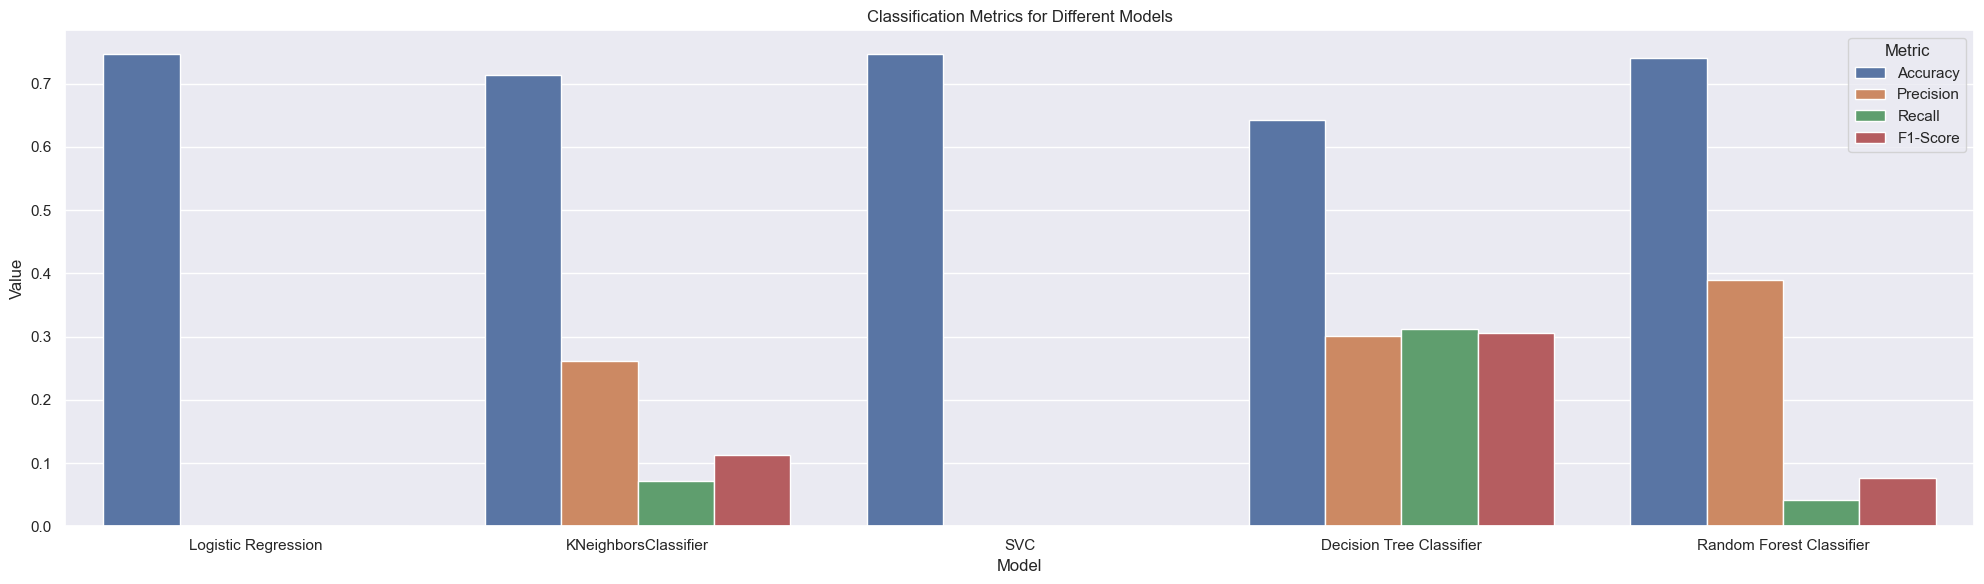

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Melt the DataFrame
classification_melted = pd.melt(models, id_vars='Model', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=classification_melted)
plt.title('Classification Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

### My choice

I choose to proceed with `DecisionTreeClassifier` and `KNeighborsClassifier` and `RandomForestClassifier` because they score decentently in terms of **accuracy** and they also have scores for **precision**, **recall** and **F1-score**, which others do not.